### Chapter 5

## Machine Learning

machine learning as a means of building models of
data. Fundamentally, machine learning involves building mathematical models to help
understand data.

##### Categories of Machine Learning

supervised learning and unsupervised learning

1. Supervised learning involves somehow modeling the relationship between measured
features of data and some label associated with the data; once this model is deter‐
mined, it can be used to apply labels to new, unknown data.

2. Unsupervised learning involves modeling the features of a dataset without reference to
any label, and is often described as “letting the dataset speak for itself.” These models
include tasks such as clustering and dimensionality reduction. 

## Introducing Scikit-Learn

### Data Representation in Scikit-Learn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


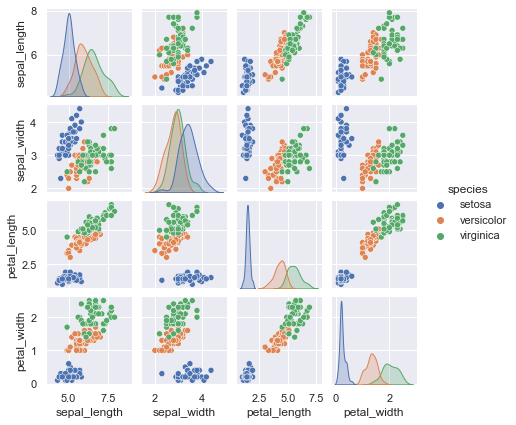

In [3]:
sns.set()
sns.pairplot(iris, hue='species', height=1.5)

### Supervised learning example: Simple linear regression

In [4]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)

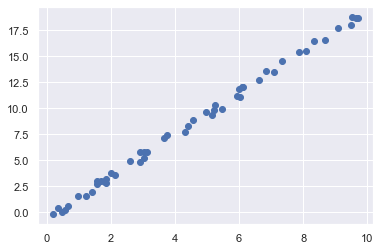

In [5]:
plt.scatter(x, y)

1. Choose a class of model

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression(fit_intercept=True)

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [9]:
model.fit(X, y)

LinearRegression()

In [10]:
model.coef_

array([2.00660766])

In [11]:
model.intercept_

-0.5350275750799973

In [12]:
xfit = np.linspace(-1, 11)

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

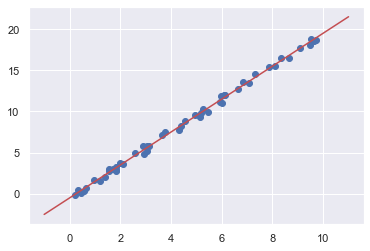

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit, 'r')

### Supervised learning example: Iris classification

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
ml = GaussianNB()
ml.fit(X_train, y_train)
y_model = ml.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9736842105263158

### Unsupervised learning example: Iris dimensionality

In [21]:
from sklearn.decomposition import PCA

In [22]:
ml = PCA(n_components=2)

In [23]:
ml.fit(X_iris)
X_2D = ml.transform(X_iris)

In [24]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

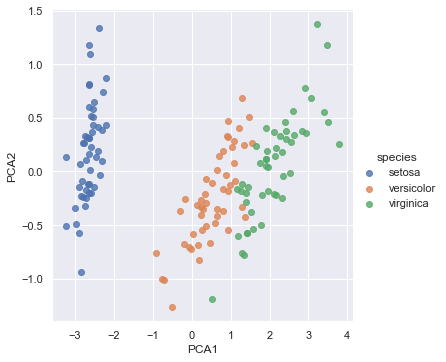

In [25]:
sns.lmplot(x='PCA1', y='PCA2', hue='species', data=iris, fit_reg=False)

### Unsupervised learning: Iris clustering

In [26]:
from sklearn.mixture import GaussianMixture

In [27]:
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)

GaussianMixture(n_components=3)

In [28]:
y_gmm = model.predict(X_iris)

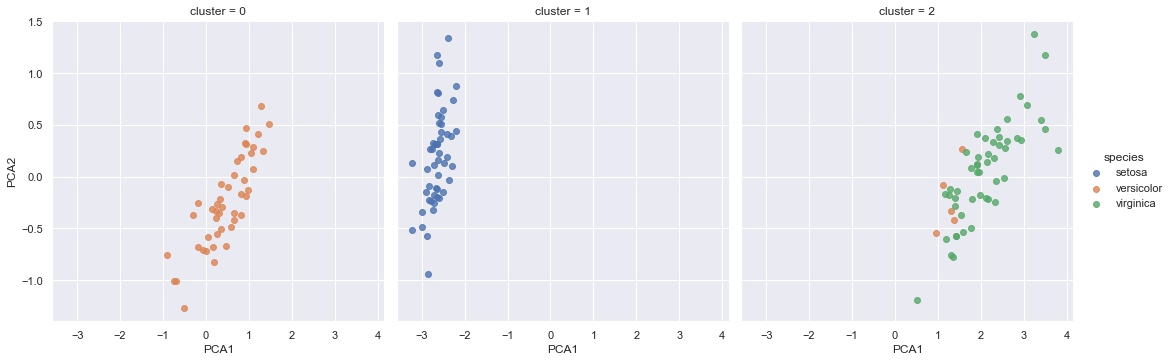

In [29]:
iris['cluster'] = y_gmm
sns.lmplot(x='PCA1', y='PCA2', data=iris, hue='species', col='cluster', fit_reg=False)

### Application: Exploring Handwritten Digits

In [30]:
# Loading and visualizing the digits data
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

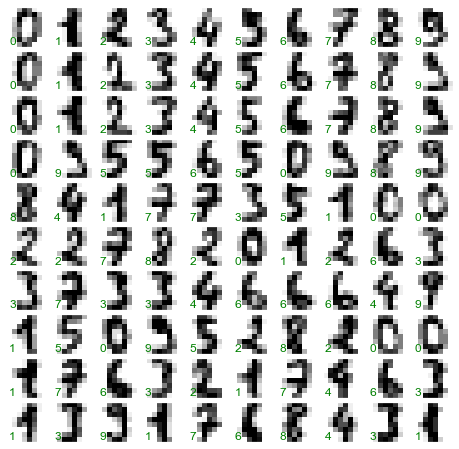

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

### Unsupervised learning: Dimensionality reduction

In [32]:
from sklearn.manifold import Isomap

In [33]:
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

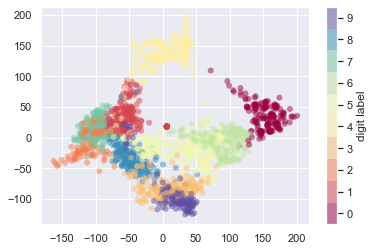

In [34]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap = plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

# Hyperparameters and Model Validation

### Model validation the wrong way ❌

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

As you may have gathered, the answer is no. In fact, this approach contains a funda‐
mental flaw: `it trains and evaluates the model on the same data`

### Model validation the right way: Holdout sets


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X1, X2, y1, y2 = train_test_split(X, y, random_state=15, train_size=0.8)

In [40]:
model.fit(X1, y1)

KNeighborsClassifier(n_neighbors=1)

In [41]:
y2_model = model.predict(X2)

In [42]:
accuracy_score(y2, y2_model)

1.0

### Validation curves in Scikit-Learn

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [51]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [57]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [71]:
X, y = make_data(40)

In [59]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [60]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

(-2.0, 12.0)

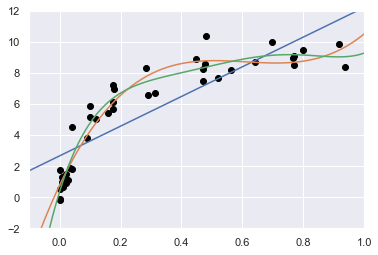

In [65]:
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)

## Learning Curves

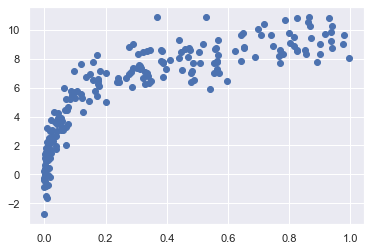

In [68]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

In [73]:
from sklearn.model_selection import validation_curve

In [79]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                             param_name=polynomialfeatures__degree,
                                             degree, cv=7)

SyntaxError: positional argument follows keyword argument (<ipython-input-79-94f8d5f666bc>, line 4)